In [2]:
import cv2
import numpy as np
from PIL import Image


In [26]:
#read in the image
image=cv2.imread("sam3.jpg")   
(h, w) = image.shape[:2]
ratio=h/w
TARGET_H=800
# resizing because opencv does not work well with bigger images
image=cv2.resize(image,(TARGET_H,int(TARGET_H*ratio))) 
base=image.copy()

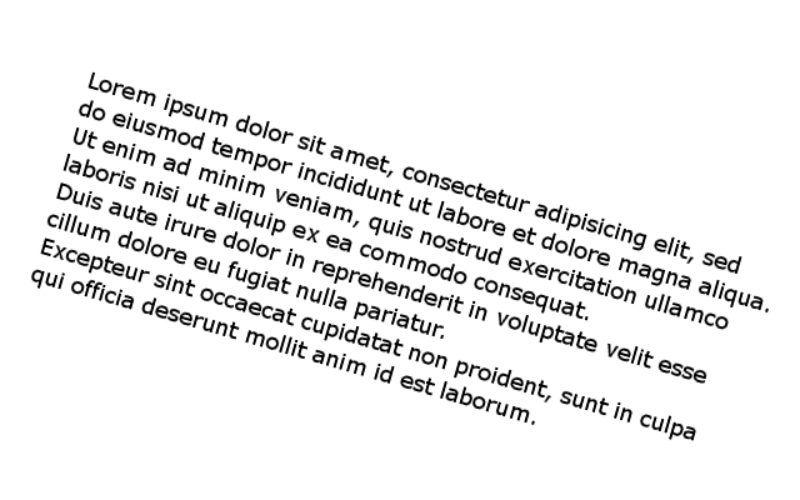

In [27]:
#RGB To Gray Scale
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  
# cv2.imshow("Title",gray)
Image.fromarray(gray)

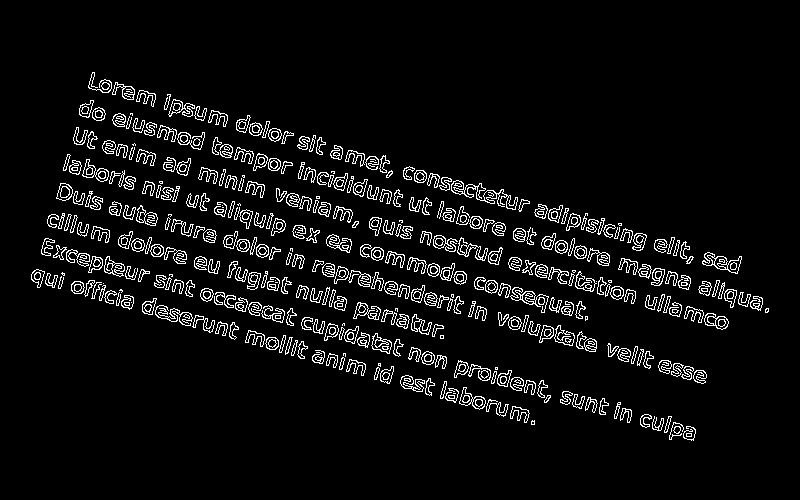

In [28]:
# Edge detection
#30 MinThreshold and 50 is the MaxThreshold
edge=cv2.Canny(gray,30,50)  
Image.fromarray(edge)


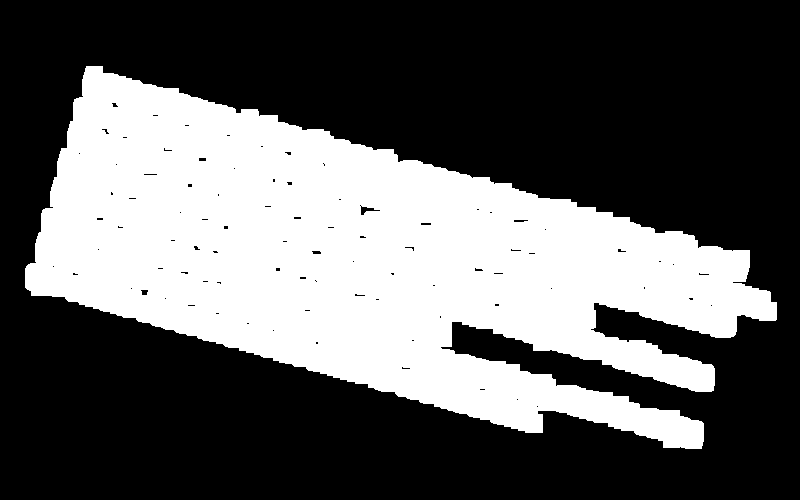

In [29]:
kernel = np.ones((8, 8))
# APPLY DILATION
dilated = cv2.dilate(edge, kernel, iterations=2) 
Image.fromarray(dilated)


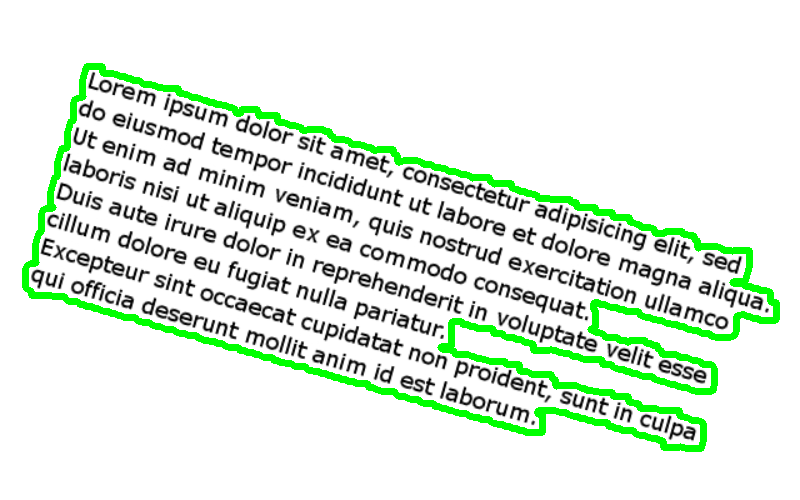

In [30]:
# FIND ALL CONTOURS
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
# DRAW ALL DETECTED CONTOURS
imgContours = base.copy() 
# -1 signifies drawing all contours
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 5) 
Image.fromarray(imgContours)

In [31]:
# then use these coordinates to compute a rotated bounding box that contains all coordinates
rect = cv2.minAreaRect(contours[0])
angle = rect[-1]

# the `cv2.minAreaRect` function returns values in the range [-90, 0]
# as the rectangle rotates clockwise the returned angle trends to 0 - in this special case weneed to add 90 degrees 
if angle < -45:
	angle = -(90 + angle)
else:
	# otherwise, just take the inverse of the angle to makeit positive
	angle = -angle

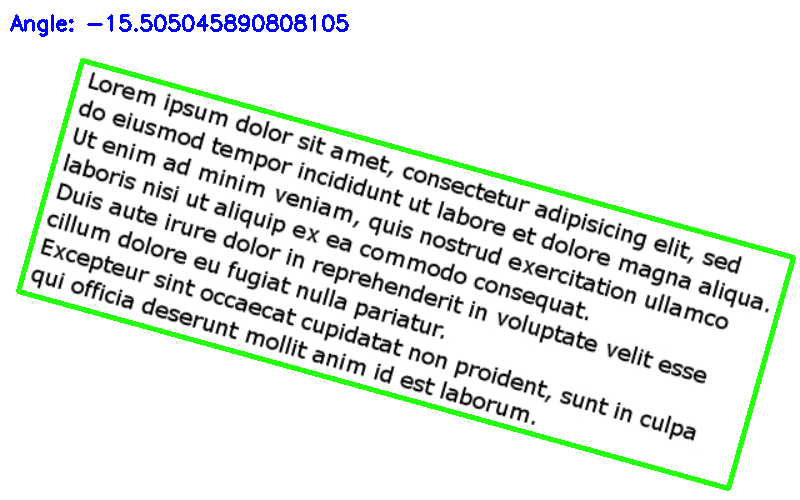

In [32]:
imgRectangle = base.copy() 

# draw the correction angle on the image so we can validate it
cv2.putText(imgRectangle, f"Angle: {angle}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# cv2.rectangle(imgRectangle,tl,br,(0,255,0),3)
box = np.intp(cv2.boxPoints(rect))
cv2.drawContours(imgRectangle, [box], 0, (36,255,12), 3)

Image.fromarray(imgRectangle)